## Preprocessing : V2

In [1]:
### For this particular project, I haven't differentiate the data earlier 
### for the distance and the tree based algorithms
### so here, I will try to repeat the same and go for the predictions afterwards

In [ ]:
### I am dropping the (year column from the dataset) becuase it contains only one unique value : 2019
### It provides like 0 variance for the data

### ----------------loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### -----------------settting up the paths

In [43]:
### so, here after making the final project, my goal in this file is to change the path of the files from the 
### hard coded text to naming a variable and then call it, that way the code is more readable

In [2]:
main_df_path = '../data/preprocessed/general/clean_final_df.csv'
df_train_path = '../data/preprocessed/general/clean_train.csv'
df_test_path = '../data/preprocessed/general/clean_test.csv'

### -------------------loading the data

In [3]:
### I won't be doing featured engineering and everything from scratch, but instead,
### my strategy is to load the already cleaned data and check the graphs and 
### apply the scaling/transformation for the distance based models

In [9]:
### so, basically (clean_final_df) file will stay as it is,
### because we don't use it and I won't be transforming/scaling it
### but as far as it comes to the (clean_train/test) file
### I will save as it for the tree based models and 
### transform/scale/remove outliers for the distance based models

In [3]:
df = pd.read_csv(main_df_path)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4


In [4]:
df_train = pd.read_csv(df_train_path)
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'year'], axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4,13302.0


In [5]:
df_test = pd.read_csv(df_test_path)
df_test.drop(['Unnamed: 0', 'year'], axis = 1, inplace = True)
df_test.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,17,30,4,25,10
1,3,3,1.0,1,0,0,1,12,5,6,20,10,20,4
2,4,4,1.0,0,1,0,0,21,5,19,15,19,0,23
3,4,4,1.0,0,0,1,1,21,5,8,0,21,0,13
4,2,2,3.0,0,0,1,1,24,6,23,55,2,45,2


In [6]:
print(f"{df.shape} : {df_train.shape} : {df_test.shape}")

(13351, 14) : (10681, 15) : (2670, 14)


### ----------------for the tree based models

In [14]:
### the data is good and perfect for the tree base models, 
### no transformation/scaling/outliers needs to be removed

In [7]:
base_path_for_trees = '../data/preprocessed/trees/'
df_train.to_csv(base_path_for_trees + 'train.csv')
df_test.to_csv(base_path_for_trees + 'test.csv')

### --------------------for the distance based models

In [18]:
### here the strategy is gonna be bit different, since we have 2 seprate versions
### one without the 'price' coumn and one with the 'price' column
### so, my strategu will be to do all the operations from our (clean_final_df) file and 
### then, use the same sclaer object for the price column as well

In [7]:
df_train = pd.read_csv(df_train_path)
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'year'], axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4,13302.0


In [8]:
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4


In [67]:
# -----------making the df_test_for_distance, and df_train_for_distance so that I can plot qq plot
# -----------and apply the functions all at once

In [9]:
df_test_for_distance = df_test

In [13]:
# df_test_for_distance.head()

In [10]:
df_test_for_distance.shape

(2670, 14)

In [11]:
# -------------df_train_for_distance
df_train_for_distance = df_train

In [70]:
# df_train_for_distance.head()

In [12]:
df_train_for_distance.shape

(10681, 15)

### ---------------qq plot template and check for the distribution

In [13]:
import scipy.stats as stat
import pylab

In [18]:
cols_to_plot = ['day', 'month', 'arrival_hour', 'arrival_minute', 'dep_hour', 'dep_minute', 'duration_hours']

In [66]:
### so, here I just checked the distribution overall and while applying for the outliers
### for that particular column, I will simply apply the lambda functions in both
### to avoid confusion

In [19]:
def plot_qq(df, feature) : 
    plt.figure(figsize = (9, 4))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

In [20]:
def plot_qq_all(df) : 
    for i, cols in enumerate(df.columns) : 
        print(f"Graph for : {cols}")
        plot_qq(df, cols)

In [ ]:
# for i, cols in enumerate(df_subset.columns) : 
#     print(f"{i} : {cols}")
# df.columns

In [67]:
# plot_qq(df, 'day')

In [18]:
# plot_qq_all(df[cols_to_plot])

In [ ]:
### now for the rest of the features, everything seems good,
### as they are categorical in numeric form and the distribution is not extreme,
### but for the duration_hours, I will look for the outliers rather and then again check the distribution
### then in the end I will apply the standar scaler (range : 0-1)

In [14]:
# ------------------outliers for the duration_hours column
Q3 = df['duration_hours'].quantile(0.75)
Q1 = df['duration_hours'].quantile(0.25)
print(f"{df['duration_hours'].max()} : {df['duration_hours'].min()} :: {Q1} : {Q3}")

47 : 1 :: 2.0 : 15.0


In [15]:
# ------------so, we are good with lower limit, I only need to work for the upper limit
IQR = Q3-Q1
print(f"{Q3 + 1.5*IQR}")

34.5


In [24]:
# ----------------taking the upper limit 32 instead for the df_test_for_distance and df_train_for_distance

### ----------------handling the outliers

In [16]:
df_test_for_distance['duration_hours'] = df_test_for_distance['duration_hours'].apply(lambda x : 32 if x > 32 else x)
df_train_for_distance['duration_hours'] = df_train_for_distance['duration_hours'].apply(lambda x : 32 if x > 32 else x)

In [26]:
print(f"{df_test_for_distance['duration_hours'].min()} : {df_test_for_distance['duration_hours'].max()}")
print(f"{df_train_for_distance['duration_hours'].min()} : {df_train_for_distance['duration_hours'].max()}")

1 : 32
1 : 32


### ----------------veryfying the distribution

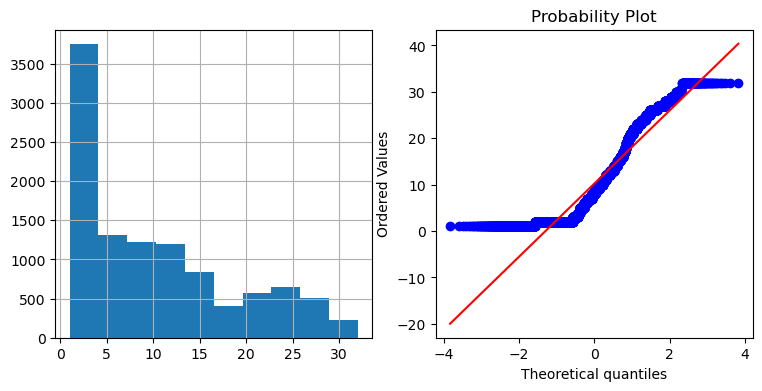

In [21]:
plot_qq(df_train_for_distance, 'duration_hours')

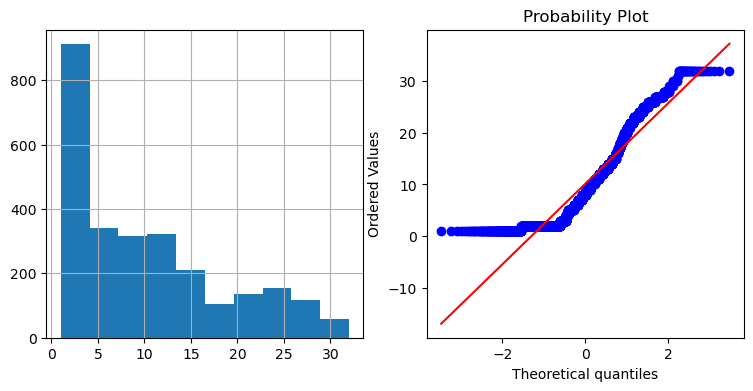

In [22]:
plot_qq(df_test_for_distance, 'duration_hours')

### -----------------applying the scaler now(for the common features)

In [27]:
### for the scaler, I will first apply th scaler on train data and
### then use the same scaler for the test data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [24]:
# ---------------for the train and test data
cols_to_scale_for_both = ['day', 'month', 'dep_hour', 'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hours']

In [31]:
# df_train_for_distance.head()

In [25]:
df_train_for_distance[cols_to_scale_for_both] = scaler.fit_transform(df_train_for_distance[cols_to_scale_for_both])
df_test_for_distance[cols_to_scale_for_both] = scaler.fit_transform(df_test_for_distance[cols_to_scale_for_both])

In [28]:
# df_train_for_distance.head()
# df_test_for_distance.head()

### ---------------saving the scaler

In [34]:
# ----------------saving the scaler for the rest of the projects
# ----------------this scaler is for the rest of the features, for the price
# ----------------I have to do it the other way otherwise, the other file was broken
import joblib
scaler_for_both_path = '../scalers/scaler_for_common.pkl'
joblib.dump(scaler, scaler_for_both_path)

['../scalers/scaler_for_common.pkl']

### --------------applying and saving the scaler for 'price' only

In [30]:
col_price_only = ['price']

In [36]:
scaler_price = MinMaxScaler(feature_range = (0, 1))
df_train_for_distance[col_price_only] = scaler_price.fit_transform(df_train_for_distance[col_price_only])

In [33]:
# df_train_for_distance.head()

In [37]:
# ------------saving it
scaler_for_price_path = '../scalers/scaler_for_price_only.pkl'
joblib.dump(scaler_price, scaler_for_price_path)

['../scalers/scaler_for_price_only.pkl']

### ---------------making the copies for the distance based models

In [38]:
base_path_for_distance = '../data/preprocessed/distance/'
df_train_for_distance.to_csv(base_path_for_distance + 'train.csv')
df_test_for_distance.to_csv(base_path_for_distance + 'test.csv')

In [39]:
# ----------------------veryfying everything
df_train_for_distance = pd.read_csv(base_path_for_distance + 'train.csv')
df_test_for_distance = pd.read_csv(base_path_for_distance + 'test.csv')

In [41]:
# df_train_for_distance.head()

In [63]:
# df_test_for_distance.head()